<a href="https://colab.research.google.com/github/Meidyt/TugasKlasifikasi/blob/main/DTITugasKlasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada kali ini, saya akan membandingkan 2 metode klasifikasi dengan data set yang telah diambil dari Kaggle. Metode klasifikasi yang saya ambil adalah Logistic regression dan Naive Bayes Classifier. 

## **LOGISTIC REGRESSION**

# Import Library

Seperti biasa, kita harus melakukan import beberapa library yang akan digunakan

In [129]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# Load Data Set 

Lalu, melakukan import dataset. Pada kali ini data set berapa pada repository saya sendiri. 




In [39]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Meidyt/TugasKlasifikasi/main/bank.xls', sep = ',')
bank_df
bank_df.head()





,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Pre-pocessing & Selection

Karena pada data set masih terdapat data yang belum binary (tipe data binary menjadi syarat penggunaan logistic regression), sehingga perlu dilakukan konversi tipe data.

In [40]:
bank_df["deposit"] = bank_df["deposit"].map({"yes":1,"no":0}) 
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


Selain pada data deposit, konversi data juga dilakukan untuk data-data lain.

In [41]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(bank_df[['job', 'marital', 'education', 'housing', 'default', 'contact' , 'loan' , 'month', 'poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'housing', 'default', 'contact' , 'loan' , 'month', 'poutcome'])

# Replace Categotical Data with Encoded Data
bank_df.drop(['job', 'marital', 'education', 'housing', 'default', 'contact' , 'loan' , 'month', 'poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([bank_df, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Setelah semua data sudah dikonversi, maka bisa dilakukan mendefinisian variabel X dan Y nya

In [45]:
X = np.asarray(df_encoded[[ 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous' ]])
X[0:5]

array([[  59, 2343,    5, 1042,    1,   -1,    0],
       [  56,   45,    5, 1467,    1,   -1,    0],
       [  41, 1270,    5, 1389,    1,   -1,    0],
       [  55, 2476,    5,  579,    1,   -1,    0],
       [  54,  184,    5,  673,    2,   -1,    0]])

In [46]:
y = np.asarray(df_encoded['deposit'])
y [0:5]

array([1, 1, 1, 1, 1])

Selanjutnya dilakukan normalisasi data.

In [44]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.49,  0.25, -1.27,  1.93, -0.55, -0.48, -0.36],
       [ 1.24, -0.46, -1.27,  3.15, -0.55, -0.48, -0.36],
       [-0.02, -0.08, -1.27,  2.93, -0.55, -0.48, -0.36],
       [ 1.16,  0.29, -1.27,  0.6 , -0.55, -0.48, -0.36],
       [ 1.07, -0.42, -1.27,  0.87, -0.19, -0.48, -0.36]])

# Train & Test Data Set

Setelah itu, melakukan persiapan untuk melakukan training dan test dataset

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8929, 7) (8929,)
Test set: (2233, 7) (2233,)


# Modeling (Logistic Regression)

Setelah melakukan pembagian berapa jumlah yang akan di test, maka bisa lanjut ke pemodelan 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [115]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.76, 0.24],
       [0.77, 0.23],
       [0.76, 0.24],
       ...,
       [0.47, 0.53],
       [0.66, 0.34],
       [0.29, 0.71]])

# Evaluation

setelah dilakukan pembangunan model, maka harus dilakukan beberapa evaluasi

In [100]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7344379758172862

In [ ]:
acc_LR = metrics.accuracy_score(y_test, yhat)
prec_LR = metrics.precision_score(y_test, yhat)
rec_LR = metrics.recall_score(y_test, yhat)
f1_LR = metrics.f1_score(y_test, yhat)
kappa_LR = metrics.cohen_kappa_score(y_test, yhat)
print("Accuracy:", acc_LR)
print("Precision:", prec_LR)
print("Recall:", rec_LR)
print("F1 Score:", f1_LR)
print("Cohens Kappa Score:", kappa_LR)

Accuracy: 0.7344379758172862
Precision: 0.7524324324324324
Recall: 0.6566037735849056
F1 Score: 0.7012594458438287
Cohens Kappa Score: 0.4642256438890474


# Confusion Matrix

Confusion matrix bisa digunakan untuk melihat kualitas dari model yang telah dibangun. Hal ini bisa menjadi salah satu sarana evaluasi juga. 

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2119 1090]
 [ 679 2810]]


Confusion matrix, without normalization
[[696 364]
 [229 944]]


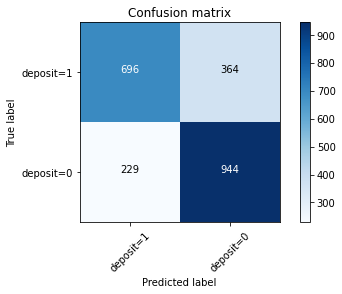

In [101]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['deposit=1','deposit=0'],normalize= False,  title='Confusion matrix')

In [102]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1173
           1       0.75      0.66      0.70      1060

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233



# Log Loss Evaluation

Log loss juga salah satu sarana evaluasi, semakin kecil nilainya maka semakin bagus. 

In [103]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5374443390187906

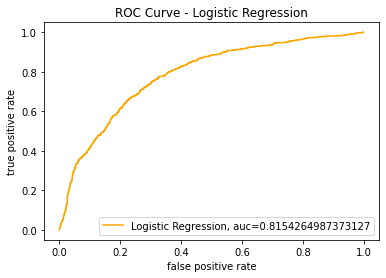

In [127]:
# ROC Curve
yhat_prob = LR.predict_proba(X_test) [::,1]
fprLR, tprLR, _ = metrics.roc_curve(y_test,  yhat_prob)
auclr = metrics.roc_auc_score(y_test, yhat_prob)
plt.plot(fprgnb,tprgnb,label="Logistic Regression, auc="+str(auclr), color="orange")
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)

plt.show()

# **NAIVE BAYES CLASSIFIER**

Karena sebelumnya kita telah melakukan data pre-processing, maka untuk metode selanjutnya yaitu Naive Bayes Classifier bisa langsung memasuki tahapan permodelan. 

# Modeling use Naive Bayes Classifier

In [139]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_gnb= gnb.predict(X_test)

# Accuracy test

In [217]:
acc_gnb = metrics.accuracy_score(y_test, y_gnb)
prec_gnb = metrics.precision_score(y_test, y_gnb)
rec_gnb = metrics.recall_score(y_test, y_gnb)
f1_gnb = metrics.f1_score(y_test, y_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7057769816390506
Precision: 0.7378984651711924
Recall: 0.589622641509434
F1 Score: 0.6554798112218143
Cohens Kappa Score: 0.4042772723009098


# Confussion Martrix

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_gnb, labels=[1,0]))

[[625 435]
 [222 951]]


Confusion matrix, without normalization
[[625 435]
 [222 951]]


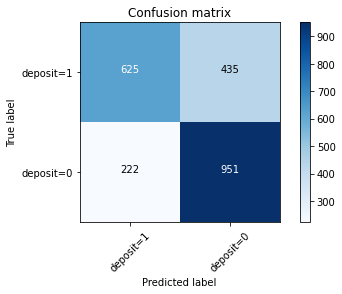

In [222]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_gnb, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['deposit=1','deposit=0'],normalize= False,  title='Confusion matrix')



# ROC Curve of Naive Bayes 

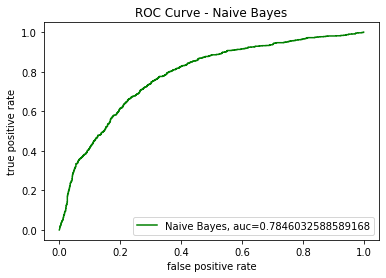

In [145]:
# ROC Curve
y_gnb_prob = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_gnb_prob)
aucgnb = metrics.roc_auc_score(y_test, y_gnb_prob)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb),color="green")
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **Comparison Chart of Logistic Regression and Naive Bayes Classifier**

Setelah mendapatkan output dari kedua metode, maka bisa kita bandingkan grafiknya. 

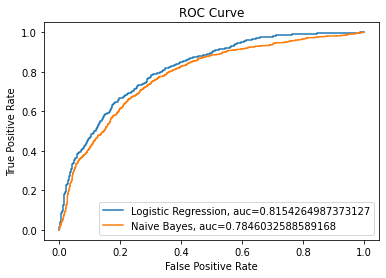

In [146]:
plt.plot(fprLR,tprLR,label="Logistic Regression, auc="+str(auclr))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Accuracy Comparison

Selain grafik, dapat dibandingkan output berbentuk akurasinya. 

In [216]:
acc_LR = metrics.accuracy_score(y_test, yhat)
prec_LR = metrics.precision_score(y_test, yhat)
rec_LR = metrics.recall_score(y_test, yhat)
f1_LR = metrics.f1_score(y_test, yhat)
kappa_LR = metrics.cohen_kappa_score(y_test, yhat)
acc_gnb = metrics.accuracy_score(y_test, y_gnb)
prec_gnb = metrics.precision_score(y_test, y_gnb)
rec_gnb = metrics.recall_score(y_test, y_gnb)
f1_gnb = metrics.f1_score(y_test, y_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_gnb)
print("Accuracy Logistic Regression:", acc_LR)
print("Accuracy Naive Bayes Classifier:", acc_gnb)
print("Precision Logistic Regression:", prec_LR)
print("Precision Naive Bayes Classifier:", prec_gnb)
print("Recall Logistic Regression:", rec_LR)
print("Recall Naive Bayes Classifier:", rec_gnb)
print("F1 Score Logistic Regression:", f1_LR)
print("F1 Score Naive Bayes Classifier:", f1_gnb)
print("Cohens Kappa Score Logistic Regression:", kappa_LR)
print("Cohens Kappa Score Naive Bayes Classifier:", kappa_gnb)




Accuracy Logistic Regression: 0.7344379758172862
Accuracy Naive Bayes Classifier: 0.7057769816390506
Precision Logistic Regression: 0.7524324324324324
Precision Naive Bayes Classifier: 0.7378984651711924
Recall Logistic Regression: 0.6566037735849056
Recall Naive Bayes Classifier: 0.589622641509434
F1 Score Logistic Regression: 0.7012594458438287
F1 Score Naive Bayes Classifier: 0.6554798112218143
Cohens Kappa Score Logistic Regression: 0.4642256438890474
Cohens Kappa Score Naive Bayes Classifier: 0.4042772723009098
